## Walmart Sales Data

One of the leading retail stores in the US, Walmart, would like to predict the sales accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict sales like economic conditions including CPI, Unemployment Index, etc. Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_walmart=pd.read_csv("C:/Users/swaminathan/Desktop/Project DataSets/EDA/MSE/Walmart_Store_sales.csv")

In [4]:
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Objectives

Whether these parameters have association with Weekly Sales?<br>
Holiday_Flag <br>
Temperature  <br>
Fuel_Price <br>
CPI <br>
Unemplyement <br>
 




In [5]:
df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
list(df_walmart.columns)

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

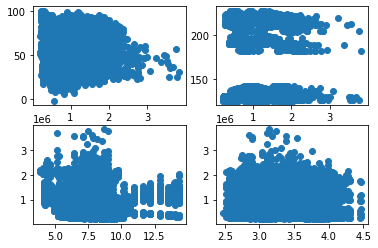

In [8]:
figure,axis=plt.subplots(2,2)
axis[0,0].scatter(df_walmart['Weekly_Sales'],df_walmart['Temperature'])    
axis[0][1].scatter(df_walmart['Weekly_Sales'],df_walmart['CPI']) 
axis[1][0].scatter(df_walmart['Unemployment'],df_walmart['Weekly_Sales']) 
axis[1][1].scatter(df_walmart['Fuel_Price'],df_walmart['Weekly_Sales']) 

In [9]:
df_walmart['Weekly_Sales'].max()

3818686.45

### The Maximum weekly Sales by a Store was for $3818686.45

In [10]:
print("The Store with Highest weekly sales among all 45 Stores is",df_walmart[df_walmart['Weekly_Sales']==3818686.45].Store.item())
print("The Store with Highest weekly sales among all 45 Stores is",df_walmart[df_walmart['Weekly_Sales']==3818686.45].Date.item())

The Store with Highest weekly sales among all 45 Stores is 14
The Store with Highest weekly sales among all 45 Stores is 24-12-2010


### The Maximum Weekly Sales was made by Store 14 on 24-12-2010(Thanks Giving Week)

In [11]:
df_walmart['Weekly_Sales'].min()

209986.25

### The Minimum weekly Sales by a Store was for $209986.25

In [12]:
print("The Store with lowest weekly sales among all 45 Stores is",df_walmart[df_walmart['Weekly_Sales']==209986.25].Store.item())
print("The Store with lowest weekly sales among all 45 Stores is",df_walmart[df_walmart['Weekly_Sales']==209986.25].Date.item())

The Store with lowest weekly sales among all 45 Stores is 33
The Store with lowest weekly sales among all 45 Stores is 03-12-2010


### The Minimum Weekly Sales was made by Store 33 on 03-12-2010

In [13]:
hoolidayFlag_Date_Analysis=[]
for i in list(df_walmart['Store'].unique()):
    maxsales=df_walmart[df_walmart['Store']==i]['Weekly_Sales'].max()
    maxsalesdate=df_walmart[df_walmart['Weekly_Sales']==maxsales].Date.item()
    maxsalesflaf=df_walmart[df_walmart['Weekly_Sales']==maxsales].Holiday_Flag.item()
    hoolidayFlag_Date_Analysis.append([maxsalesdate,maxsalesflaf])

In [14]:
holidayweek=0
nonhoildayweek=0
for i in range(len(hoolidayFlag_Date_Analysis)):
    if(hoolidayFlag_Date_Analysis[i][1]==1):
        holidayweek+=1
    else:
        nonhoildayweek+=1
print("The Number of Stores which had maximum sales in non holiday week is",nonhoildayweek)
print("The Number of Stores which had maximum sales in holiday week is",holidayweek)    

The Number of Stores which had maximum sales in non holiday week is 42
The Number of Stores which had maximum sales in holiday week is 3


### The Number of Stores which had maximum sales in non holiday week is 42
### Number of Stores which had maximum sales in holiday week is 3

In [15]:
#Seperating Day Month and Year from Date for Hypothesis Testing
df_walmart['year'] = pd.DatetimeIndex(df_walmart['Date']).year
df_walmart['month'] = pd.DatetimeIndex(df_walmart['Date']).month
df_walmart['Day']= pd.DatetimeIndex(df_walmart['Date']).day

<BarContainer object of 6435 artists>

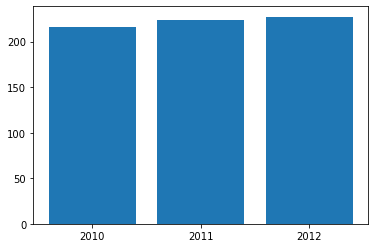

In [16]:
plt.bar(df_walmart['year'].astype(str),df_walmart['CPI'])

## HYPOTHESIS TESTING 1

#### NULL HYPOTHESIS : SALES IN NON HOLIDAY WEEK IS LESS OR EQUAL COMPARED TO HOLIDAY WEEK


#### ALTERNATE HYPOTHESIS : SALES IN NON HOLIDAY WEEK IS GREATER THAN HOLIDAY WEEK

In [17]:
df_walmart_holiday=df_walmart[df_walmart['Holiday_Flag']==1] 
#Filter Weeks which had Holiday

In [18]:
df_walmart_holiday.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10,9
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,31
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11,2


In [19]:
df_walmart_nonholiday=df_walmart[df_walmart['Holiday_Flag']==0]
df_walmart_nonholiday.head()
#Filter Weeks which had no Holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,3


In [20]:
print(df_walmart_holiday[df_walmart_holiday['year']==2010].shape)
print(df_walmart_nonholiday[df_walmart_nonholiday['year']==2010].shape)

(180, 11)
(1980, 11)


This give us a contest that there are 4 Holiday weeks and 44 Non Holiday Weeks

In [21]:
q=df_walmart_holiday.groupby(['year'])['Weekly_Sales'].mean().get(2010)
q

1112358.8761666666

#### The Average weekly sales on a Holiday week accross all stores in 2010 is $1112358

In [22]:
w=df_walmart_holiday.groupby(['year'])['Weekly_Sales'].std().get(2010)
w

636158.2087668811

#### The Standard Deviation weekly sales on a Holiday week accross all stores in 2010 is $636158

In [23]:
e=df_walmart_nonholiday.groupby(['year'])['Weekly_Sales'].mean().get(2010)
e

1054879.5569191917

#### The Average weekly sales on a non Holiday week accross all stores in 2010 is $1054879

In [24]:
r=df_walmart_nonholiday.groupby(['year'])['Weekly_Sales'].std().get(2010)
r

577185.3215840224

#### The Standard Deviation weekly sales on a non Holiday week accross all stores in 2011 is $577185

In [25]:
t=(q-e)/np.sqrt((w/180)+(r/1980))

In [26]:
abs(t)

929.2980476877126

In [27]:
dof=1980+180-2

In [28]:
from scipy import stats
crticalt = stats.t.ppf(1-0.05,df=dof)

In [29]:
crticalt 

1.6455600344906018

In [30]:
if (abs(t)>crticalt):
    print ("Accepting Alternate Hypothesis")
else:
    print ("Accepting Null Hypothesis")

Accepting Alternate Hypothesis


In [31]:
for j in list(df_walmart['year'].unique()):
    AlternateHypothesis =0
    NullHypothesis =0
    for i in list(df_walmart['Store'].unique()):
        dof1=df_walmart_holiday[(df_walmart_holiday['year']==j) & (df_walmart_holiday['Store']==i)].shape[0]
        dof2=df_walmart_nonholiday[(df_walmart_nonholiday['year']==j) & (df_walmart_nonholiday['Store']==i)].shape[0]
        dummy1=df_walmart_holiday[(df_walmart_holiday['year']==j) & (df_walmart_holiday['Store']==i)]
        dummy2=df_walmart_nonholiday[(df_walmart_nonholiday['year']==j) & (df_walmart_nonholiday['Store']==i)]
        q=dummy1['Weekly_Sales'].mean()
        w=dummy1['Weekly_Sales'].std()
        e=dummy2['Weekly_Sales'].mean()
        r=dummy2['Weekly_Sales'].std()   
        t=(q-e)/np.sqrt((w/dof1)+(r/dof2))
        crticalt = stats.t.ppf(1-0.05,df=dof1+dof2-2)
        if (abs(t)>crticalt):
            AlternateHypothesis+=1
        else:
            NullHypothesis+=1
    print("Alternate Hypothesis is accepeted in "+str(AlternateHypothesis)+" Stores in the year "+str(j))
    print("Null Hypothesis is accepeted in "+str(NullHypothesis)+" Stores in the year "+str(j))

Alternate Hypothesis is accepeted in 45 Stores in the year 2010
Null Hypothesis is accepeted in 0 Stores in the year 2010
Alternate Hypothesis is accepeted in 45 Stores in the year 2011
Null Hypothesis is accepeted in 0 Stores in the year 2011
Alternate Hypothesis is accepeted in 45 Stores in the year 2012
Null Hypothesis is accepeted in 0 Stores in the year 2012


## HYPOTHESIS TESTING 2

#### NULL HYPOTHESIS : HOLIDAY WEEK SALES IN 2010 IS LESSER THAN OR EQUAL TO 2011


#### ALTERNATE HYPOTHESIS : HOLIDAY WEEK SALES IN 2010 IS GREATER THAN TO 2011

In [32]:
q=df_walmart_holiday.groupby(['year'])['Weekly_Sales'].mean().get(2010)
w=df_walmart_holiday.groupby(['year'])['Weekly_Sales'].std().get(2010)
e=df_walmart_holiday.groupby(['year'])['Weekly_Sales'].mean().get(2011)
r=df_walmart_holiday.groupby(['year'])['Weekly_Sales'].std().get(2011)
dof1=df_walmart_holiday[(df_walmart_holiday['year']==2010)].shape[0]
dof2=df_walmart_holiday[(df_walmart_holiday['year']==2011)].shape[0]
t=(q-e)/np.sqrt((w/dof1)+(r/dof2))
crticalt = stats.t.ppf(1-0.05,df=dof1+dof2-2)
if (abs(t)>crticalt):
    print('Alternate Hypothesis is accepted ')
else:
    print('Null Hypothesis is accepted')

Alternate Hypothesis is accepted 


### We conclude from the Hypothesis testing is that Holiday Week Sales in 2010 is greater than 2011

ADDING REGIONS TO THE STORES <br>
Initially Setting all to South <br>
Manipulating Store 13 to 24 as West <br>
Manipulating Store 25 to 36 as East <br>
Manipulating Store 37 to 45 as North <br>

In [33]:
df_walmart['Region']='South'

In [34]:
df_walmart.loc[6433,'Region']="West"

In [35]:
for i in range(13,25):
    indexlist=df_walmart[df_walmart['Store']==i].index.values
    for j in indexlist:
        df_walmart.loc[j,'Region']="West"
for i in range(25,37):
    indexlist=df_walmart[df_walmart['Store']==i].index.values
    for j in indexlist:
        df_walmart.loc[j,'Region']="East" 
for i in range(37,46):
    indexlist=df_walmart[df_walmart['Store']==i].index.values
    for j in indexlist:
        df_walmart.loc[j,'Region']="North"         

In [36]:
df_walmart.Region.value_counts()

South    1716
West     1716
East     1716
North    1287
Name: Region, dtype: int64

## ANNOVA TESTING

#### NULL HYPOTHESIS : THE SALES ACROSS REGIONS IS SAME 

#### ALTERNATE HYPOTHESIS : THE SALES ACROSS REGIONS IS NOT SAME

In [37]:
#THE ABOVE ANALYSIS WILL BE PERFORMED FOR BOTH THE YEARS 2010 and 2011

Correction Measure is Aggregation of All Sales in 2010 divided by the number of Observation

In [38]:
print(df_walmart[df_walmart['year']==2010].Weekly_Sales.sum())
CM=(int(df_walmart[df_walmart['year']==2010].Weekly_Sales.sum())**2)/df_walmart[df_walmart['year']==2010].shape[0]
print("Correction Measure = ",CM)

2288886120.41
Correction Measure =  2425462810337340.0


In [39]:
df_walmart.Region.value_counts()

South    1716
West     1716
East     1716
North    1287
Name: Region, dtype: int64

Sum of Squares of Total is calculated by Squaring each term and Summing it up and subracting the Correction measure

In [40]:
Sum_of_Square_of_Observation=df_walmart[df_walmart['year']==2010].Weekly_Sales**2
SST=Sum_of_Square_of_Observation.sum()-CM

In [41]:
df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="South")].shape[0]

576

Sum of Square Between <br>
The values of each regions are aggregated and sum is squared and divided by number of observations in the respective region <br>
The regions wise aggregation is summed up and correction measure is subracted and this gives us the Sum of Sqaure Betweem

Sum of Square Within (Error) <br>
The difference between Sum of Sqaure (Total) and Sum of Sqaure (Between)

Degree of Freedom  <br>
SSB= Number of Columns - 1 (Here Each Region is considered as Column) <br>
SSW/SSE = Total Number of Observation - Number of Columns  <br>


Mean Sqaure : <br>
Mean Sum of Sqaure Between => Sum of Squares Between divided by the corresponding Degree of Freedom <br>
Mean Sum of Sqaure Within  => Sum of Squares Within  divided by the corresponding Degree of Freedom <br>

Confidence Interval : 95%

In [42]:
SSSouth=int(df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="South")].Weekly_Sales.sum())**2/df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="South")].shape[0]
SSWest=int(df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="West")].Weekly_Sales.sum())**2/df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="West")].shape[0]
SSEast=int(df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="East")].Weekly_Sales.sum())**2/df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="East")].shape[0]
SSNorth=int(df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="North")].Weekly_Sales.sum())**2/df_walmart[(df_walmart['year']==2010) & (df_walmart['Region']=="North")].shape[0]
SSB=int(SSSouth+SSWest+SSEast+SSNorth-CM)
SSE=SST-SSB
DofOfSSB=3
DofOdSSW=df_walmart[df_walmart['year']==2010].shape[0]-4
MSSSB=SSB/DofOfSSB
MSSSW=SSE/DofOdSSW
F=MSSSB/MSSSW
import scipy.stats
FTableStat=scipy.stats.f.ppf(q=1-.05, dfn=DofOfSSB, dfd=DofOdSSW)
if(abs(F)<FTableStat):
    print("Accepting Null Hypothesis")
else:
    print("Accepting Alternate Hypothesis")


Accepting Alternate Hypothesis


#### We conclude that THE SALES ACROSS REGIONS IS NOT SAME

Checking if there is any auto corelation between Feautures

<AxesSubplot:>

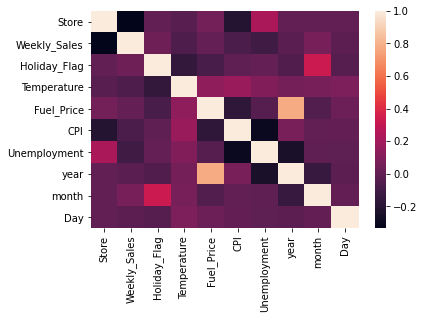

In [43]:
sns.heatmap(df_walmart.corr())

Creating Dummies for stores as Store Number plays a quite vital role in Sales Predictions

In [44]:
df_walmart_dummies=pd.get_dummies(df_walmart,columns=['Store'])

In [45]:
df_walmart_dummies

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,...,0,0,0,0,0,0,0,0,0,0
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,...,0,0,0,0,0,0,0,0,0,0
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,...,0,0,0,0,0,0,0,0,0,0
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,...,0,0,0,0,0,0,0,0,0,0
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,...,0,0,0,0,0,0,0,0,0,1
6431,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,...,0,0,0,0,0,0,0,0,0,1
6432,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,...,0,0,0,0,0,0,0,0,0,1
6433,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,...,0,0,0,0,0,0,0,0,0,1


## Regression Modelling

In [46]:
from sklearn.linear_model import LinearRegression

Applying Linear Regression Model 

In [47]:
model = LinearRegression()

In [48]:
from sklearn.model_selection import train_test_split as tts

We are splittig the data into Test and Train <br>
Test Data : 30% <br>
Train Data : 70% <br>

In [49]:
train,test= tts(df_walmart_dummies,test_size=0.3,random_state=1234)

In [50]:
train.shape

(4504, 56)

In [51]:
test.shape

(1931, 56)

Resons for Dropping Columns: <br>
Date Columns can be used in regression <br>
Weekly_Sales is the Target Variable <br>
Region was a assumption made for Annova Testing so dropping <br>
Day is not important as this a weekly sales data and also Holiday significae is given Holiday Flag <br>


In [52]:
train_x = train.drop(columns=['Weekly_Sales','Date','Day','month','year','Region'])
train_y = train['Weekly_Sales']

In [53]:
test_x = test.drop(columns=['Weekly_Sales','Date','Day','month','year','Region'])
test_y = test['Weekly_Sales']

In [54]:
from sklearn import preprocessing
x = train_x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

Model is trained with data

In [55]:
model.fit(train_x,train_y)

LinearRegression()

Model Score is given us R Sqaure of the Regression Model

In [56]:
model.score(train_x,train_y)

0.9170506952893086

In [57]:
y_pred=model.predict(test_x)

In [58]:
for i in range(len(list(test_x.columns)[:5])):
    print("The Coeffecient of ",list(test_x.columns)[i]," is ",list(model.coef_)[i])

The Coeffecient of  Holiday_Flag  is  78867.12124509037
The Coeffecient of  Temperature  is  -918.9311272623863
The Coeffecient of  Fuel_Price  is  -40240.230566062244
The Coeffecient of  CPI  is  3111.8829451634665
The Coeffecient of  Unemployment  is  -20014.38022484386


## Ordinary Least Sqaure - Understading Dependent Variables Impact

In [59]:
import statsmodels.api as sm

In [60]:
np.asarray(train_x)

array([[ 0.   , 66.98 ,  2.78 , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 14.5  ,  3.24 , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 40.2  ,  2.766, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 1.   , 84.04 ,  2.961, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 64.94 ,  2.719, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 45.31 ,  2.561, ...,  0.   ,  0.   ,  0.   ]])

In [61]:
np.asarray(train_y)

array([1802450.29, 1159438.53, 1063960.11, ..., 1720530.23, 1770333.9 ,
        749597.24])

In [62]:
train_x.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_1,Store_2,Store_3,Store_4,Store_5,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
155,0,66.98,2.780,210.050583,8.200,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3198,0,14.50,3.240,133.183419,5.114,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5732,0,40.20,2.766,189.575127,7.363,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2443,0,51.12,2.935,132.064433,9.269,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1540,0,64.21,3.734,224.716695,6.833,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
np.asarray(train_y).shape

(4504,)

In [64]:
train_x_with_constant=sm.add_constant(np.asarray(train_x))

Applying Ordinary Least Square Method to Understand the Signficane of columns

In [65]:
print(sm.OLS(np.asarray(train_y),train_x_with_constant).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1005.
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:49:32   Log-Likelihood:                -60455.
No. Observations:                4504   AIC:                         1.210e+05
Df Residuals:                    4454   BIC:                         1.213e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.391e+05    2.2e+05      3.811      0.0

## Practical Interpretation

The P Value is less 0.05 for all Independent Variables <br>
There is significant relationship between the Target Variable and Indvidual Components listed below <br>
CPI - The Consumer Price Index (CPI) is a measure that examines the average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. Changes in the CPI are used to assess price changes associated with the cost of living. <br>
     &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; CPI= (Cost of market basket in current period/Cost of market basket in current period) x 100                 

Temperature - The temperature in the city plays a key role on people coming out to purchase <br>

Holiday Flag - This is important indicator of telling whether the week had a important Holiday <br>

Fuel Price - Fuel Prices always plays a vital role in purchasing . If there is substantial increase in fuel price there will be a increase in essential goods sold. There could be singificsnt impact on fuel price on Sales 

Unemployement - Percentage of people Unempoyed in the work force

## Objective

#### FORECASTING SALES FOR A STORE

In [66]:
df_walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day,Region
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,South
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,South
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,South
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,South
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,South
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,North
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,North
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,North
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,North


We are going forecast sales for Store 1. In the below step we are extracting only date and Weekly_Sales column for analysis
In a Timeseries modelling Time is the dependent variable

In [67]:
store1=df_walmart[df_walmart['Store']==1][['Date','Weekly_Sales']]
store1.Date=store1.Date.astype('datetime64[ns]')
#store1.Date=pd.DatetimeIndex(store1.Date)
store1.set_index('Date',inplace=True)
store1

,Weekly_Sales
Date,
2010-05-02,1643690.90
2010-12-02,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-05-03,1554806.68
...,...
2012-09-28,1437059.26
2012-05-10,1670785.97
2012-12-10,1573072.81


When we decompose the Sales of Store 1 we could see there is a seesoanlity and there is tangeible trend

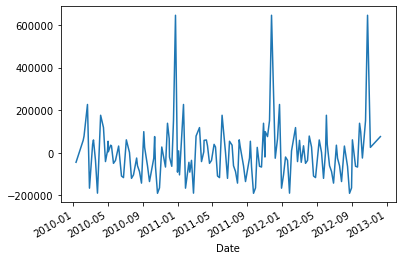

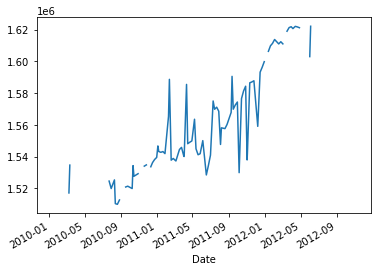

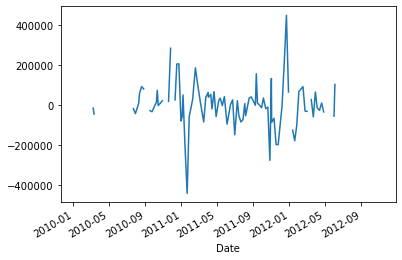

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(store1,period=48)
decomposition.seasonal.plot()
plt.show()
decomposition.trend.plot()
plt.show()
decomposition.resid.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

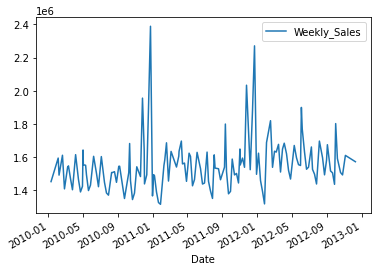

In [69]:
store1.plot()

#### Checking if the Dataset is Stationary (Most Important Factor of time series)

In [70]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(store1['Weekly_Sales'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Test Statistic                  -5.102186
p-value                          0.000014
#lags used                       4.000000
number of observations used    138.000000
critical value (1%)             -3.478648
critical value (5%)             -2.882722
critical value (10%)            -2.578065
dtype: float64


ALTERNATE HYPOTHESIS IS PROVED THE DATASET IS STATIONARY (TREND STATIONARY)

We need to find the optimal value of P and Q <br>
With ACF Plot we would be able to find the optimal value of P <br>
With PACF Plot we would be able to find the optimal value of Q <br>

In [71]:
from  statsmodels.tsa.stattools import acf as ACF
ACFOutput = ACF(store1,nlags=20)
print(ACFOutput)

[ 1.00000000e+00  3.01635656e-01  1.26974514e-01  5.95362841e-02
  2.36146134e-01 -1.21624770e-01 -9.43666039e-02  4.33021304e-02
  7.96540288e-02  4.05626132e-02  2.61507459e-02  3.56719033e-02
  7.57698431e-02  9.86570501e-02  7.17244497e-02  7.28252346e-02
  8.65362111e-02  7.69704528e-02  2.51809071e-02  9.58824335e-05
 -2.83444094e-02]


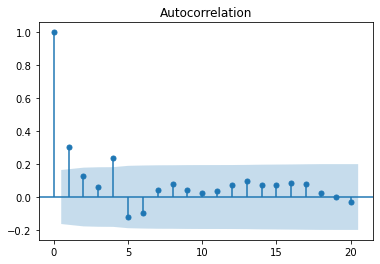

In [72]:
from statsmodels.graphics.tsaplots  import plot_acf as pltacf
pltacf(store1,lags=20)
plt.show()

In [73]:
from  statsmodels.tsa.stattools import pacf as PACF
PACFOutput = PACF(store1,nlags=20)
#print(PACFOutput)

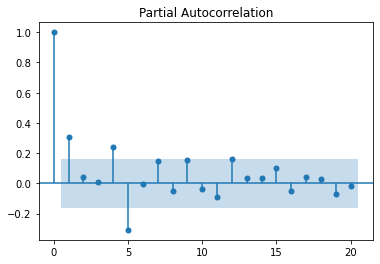

In [74]:
from statsmodels.graphics.tsaplots  import plot_pacf as pltpacf
pltpacf(store1,lags=20).show()
plt.show()

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1905.383
Date:                Mon, 19 Jul 2021   AIC                           3818.767
Time:                        14:49:35   BIC                           3830.618
Sample:                             0   HQIC                          3823.583
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.555e+06   2.24e+04     69.381      0.000    1.51e+06     1.6e+06
ar.L1          0.4740      0.313      1.517      0.129      -0.139       1.087
ma.L1         -0.1934      0.361     -0.536      0.5

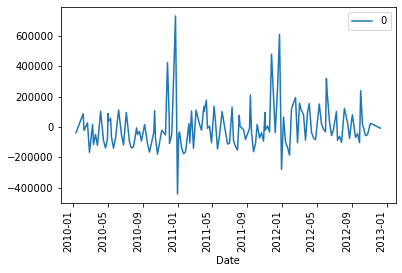

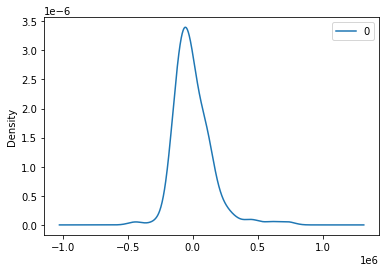

                   0
count     143.000000
mean     -182.882791
std    148542.885302
min   -441309.526357
25%    -92041.864196
50%    -33267.397586
75%     78390.171437
max    730846.460612


In [75]:
model = ARIMA(store1, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xticks(rotation=90)
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [76]:
X = store1.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = np.sqrt(mean_squared_error(test, predictions))
print('Test Error Percentage',(error/np.mean(test))*100)

Test Error Percentage 7.358040428602114


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 52)   Log Likelihood               -1893.089
Date:                            Mon, 19 Jul 2021   AIC                           3796.178
Time:                                    14:49:39   BIC                           3810.993
Sample:                                         0   HQIC                          3802.198
                                            - 143                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9993      0.007    144.215      0.000       0.986       1.013
ma.L1         -0.8660      0.070   

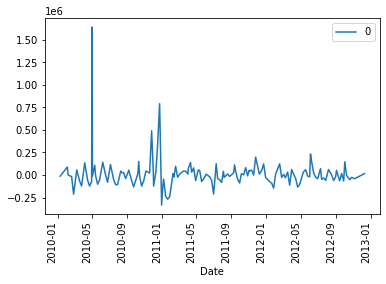

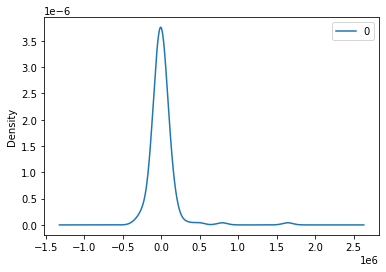

                  0
count  1.430000e+02
mean   1.311761e+04
std    1.832719e+05
min   -3.332332e+05
25%   -5.642137e+04
50%   -1.053057e+03
75%    4.574512e+04
max    1.643691e+06


In [77]:
model = SARIMAX(store1, order=(1,0,1), seasonal_order=(1,0,1,52))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.xticks(rotation=90)
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [78]:
X = store1.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = SARIMAX(history, order=(1,0,1),seasonal_order=(1,0,1,52))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = np.sqrt(mean_squared_error(test, predictions))
print('Test Error Percentage',(error/np.mean(test))*100)

Test Error Percentage 5.15346715858532


WE CONCLUDE THAT WE THERE IS SEASONALITY IN THE TIMESERIES AND WE SEE THAT SARIMAX IS GIVING BETTER RESULTS ARIMA